## Penalised regression: LASSO
-Contents
-Notes
-Source: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


In [10]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from matplotlib import pyplot as plt
%matplotlib inline 

***Functions***

In [11]:
#import helper functions
from fn_helpers import fn_print_coefficients, fn_plot_predictions

#plot data
def fn_plot_data(data):
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(data['x_1'],data['y'],'k.')
    ax1.set_xlabel('x_1',fontsize=20)
    ax1.set_ylabel('y',fontsize=20)

***Create some data***
- simulate random values for x in interval [0,1]
- compute y based on a sine function
- add gaussian noise to y

In [12]:
np.random.seed(2018)
n = 3030
x = np.random.uniform(0,1,n) #uniform random sample of size n
y = np.sin(5*x) # y = sin(5x)
e = np.random.normal(0,1/3,n) #noise (gaussian) with mean 0 and variance 1/3
y += e # y = sin(5x) + noise (white noise error term)

df_all = pd.DataFrame({'y': y,
                      'x_1': x})

#split the data into train and test sets
df_train = df_all.iloc[0:30]
df_test = df_all.iloc[30:3030]

***Plot the data***


In [13]:
# fn_plot_data(df_all)

In [14]:
# fn_plot_data(df_train)

*** Create features for polynomial regression ***
- i.e. feature engineering, creating polynomial features

In [15]:
#creates an extra 15 columns, x^2, x^3, ..., x^16
for idx in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%idx      #new var will be x_power
    df_all[colname] = df_all['x_1']**idx
df_train = df_all.iloc[0:30]

In [16]:
# print(df_all.iloc[:,0:5].head(30))

### Ridge Regression

*** Function to fit a polynomial regression model ***
- note that parameter <i>alpha = l2_penalty</i> 

In [17]:
def fn_lasso_regression(data, degree, l1_penalty):
    #instantiate
    #note that the parameter alpha below is normally referred to as lambda
    
    #identical to polynom regression, BUT
    #call Lasso instead of LinearRegression
    model = Lasso(alpha=l1_penalty) 
    vars_x = ['x_1']
    if degree >=2:
        vars_x.extend(['x_%d'%i for i in range(2,degree+1)])
    
    data_toUse = data[vars_x].copy()
    #fit linear regression, using polynomial data
    
    model.fit(X=data_toUse, y=data['y'])
    
    return model

In [9]:
# fn_plot_predictions(df_train,y[0:30])

***Fit a degree-15 polynomial with very LARGE penalty***
- Note that for Lasso Regression, lambda of 1 is sufficiently large to set all coefs to 0

In [29]:
model = fn_lasso_regression(df_train, degree=15, l1_penalty=1)

Inspect learned parameters

In [30]:
# print(model.intercept_) #prints intercept
# print(model.coef_.flatten()) #prints coefficients
fn_print_coefficients(model)

Learned polynomial for degree 15:
0.0681 + -0.0000x + -0.0000x^2 + -0.0000x^3 + -0.0000x^4 + -0.0000x^5 + -0.0000x^6 + -0.0000x^7 + -0.0000x^8 + -0.0000x^9 + -0.0000x^10 + -0.0000x^11 + -0.0000x^12 + -0.0000x^13 + -0.0000x^14 + -0.0000x^15


<b>Note that all coefficients are 0 - model is given only by intercept</b>

Form and plot our predictions along a grid of x values:

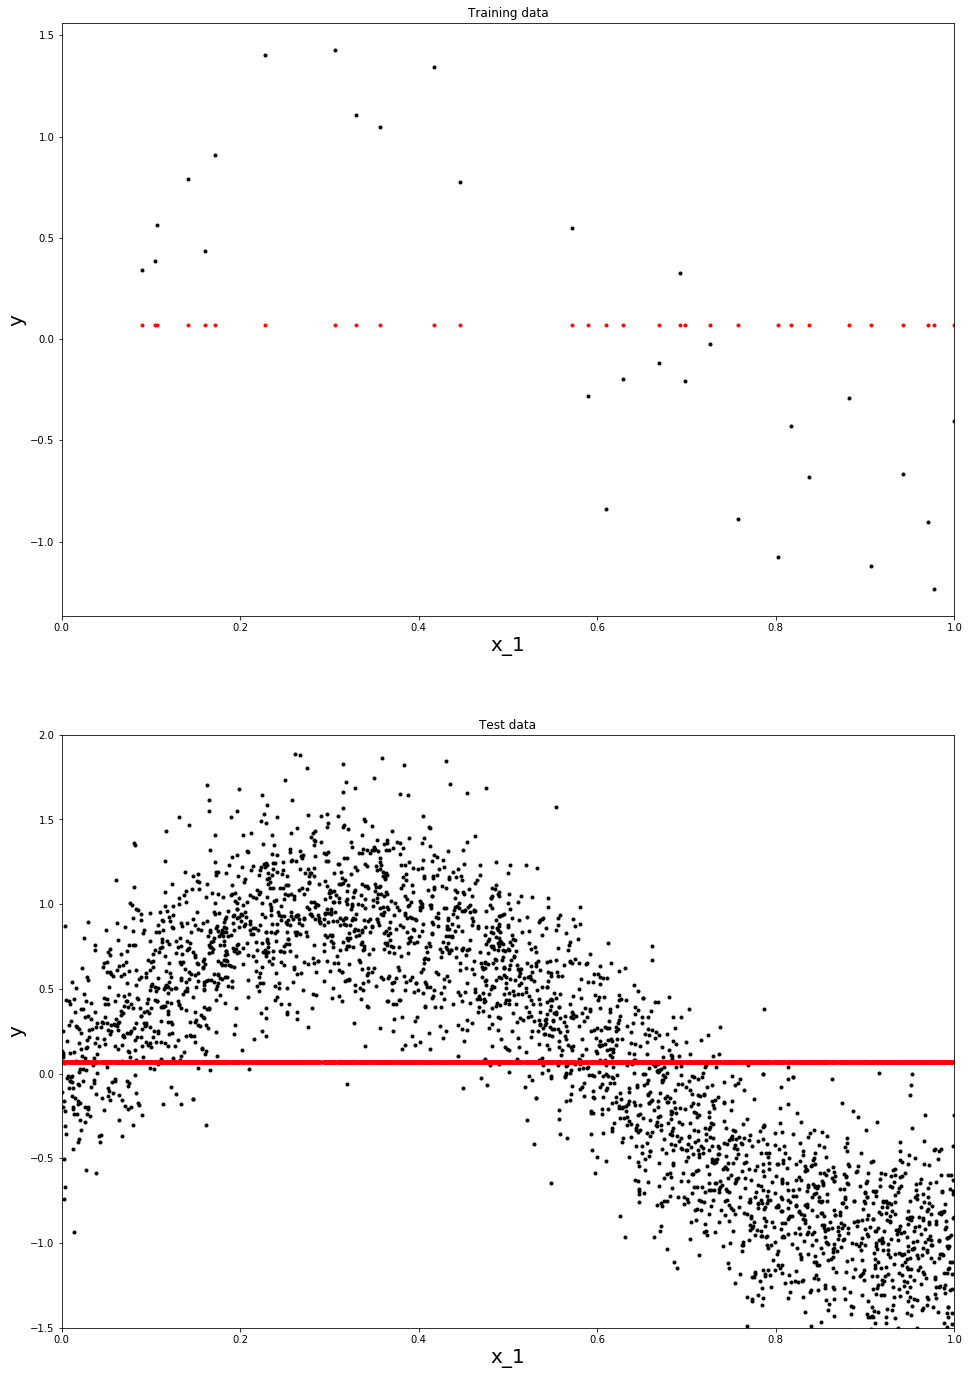

In [31]:
fn_plot_predictions(df_all,model)

***Fit a degree-15 polynomial with very SMALL penalty***
- note the size of the coefficients!

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Learned polynomial for degree 15:
-0.3049 + 9.9063x + -17.8943x^2 + 0.2207x^3 + 4.4382x^4 + 3.5059x^5 + 1.6518x^6 + 0.2041x^7 + -0.6278x^8 + -0.9573x^9 + -0.9461x^10 + -0.7269x^11 + -0.3930x^12 + -0.0046x^13 + 0.4014x^14 + 0.8034x^15


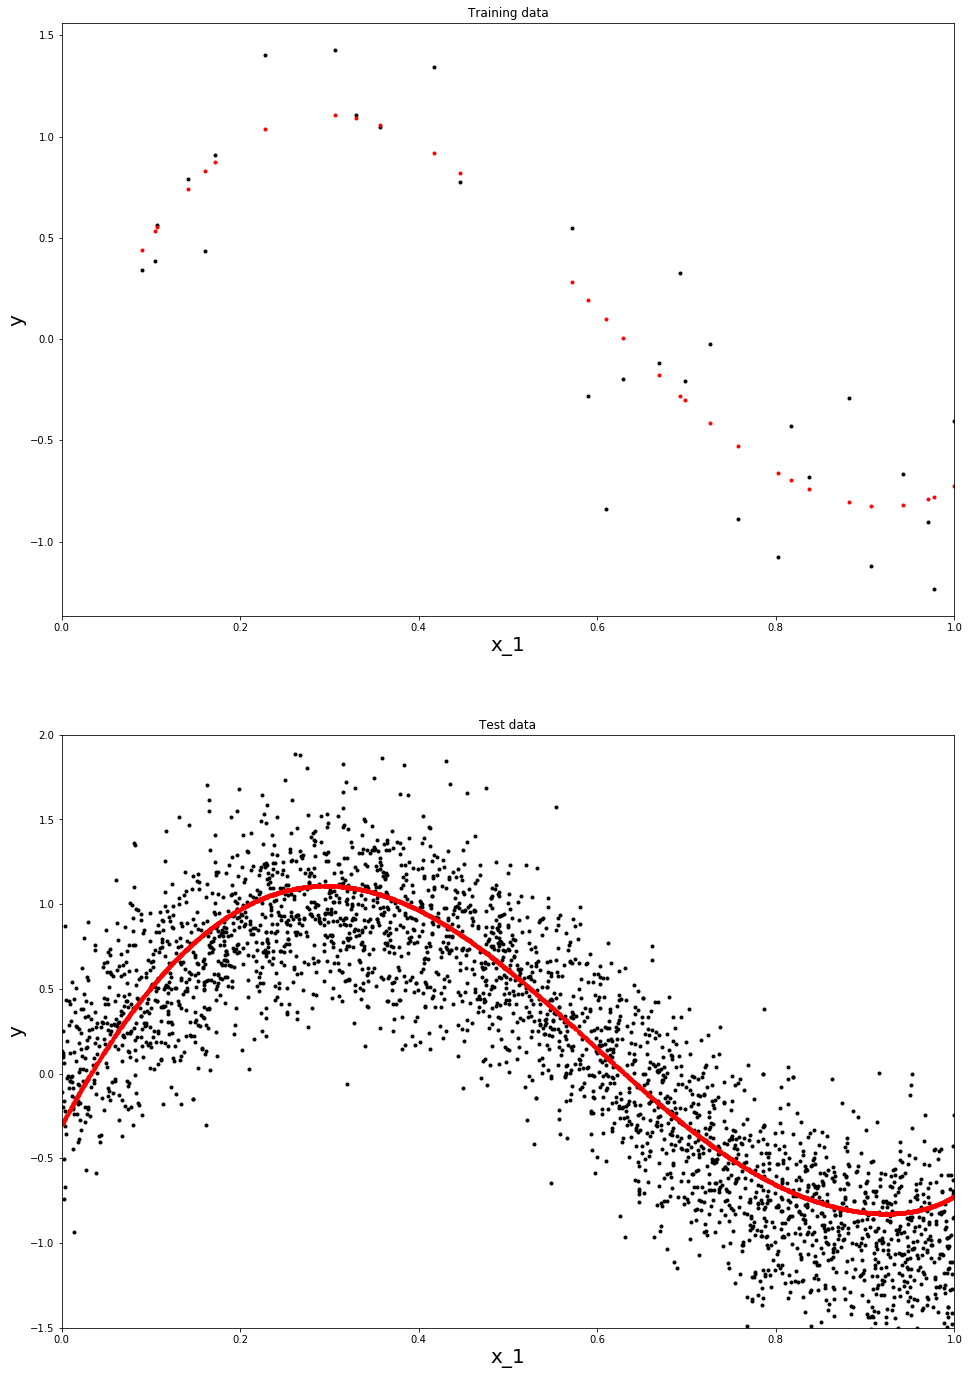

In [34]:
model = fn_lasso_regression(df_train, degree=15, l1_penalty=1e-10)
fn_print_coefficients(model)
fn_plot_predictions(df_all, model)

***Fit a 15-degree polynomial using a REASONABLE penalty***

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Learned polynomial for degree 15:
0.2778 + 4.6709x + -8.2382x^2 + -0.0000x^3 + 0.0000x^4 + 0.0000x^5 + 1.0058x^6 + 1.6118x^7 + 0.0000x^8 + 0.0000x^9 + 0.0000x^10 + 0.0000x^11 + 0.0000x^12 + 0.0000x^13 + 0.0000x^14 + -0.0000x^15


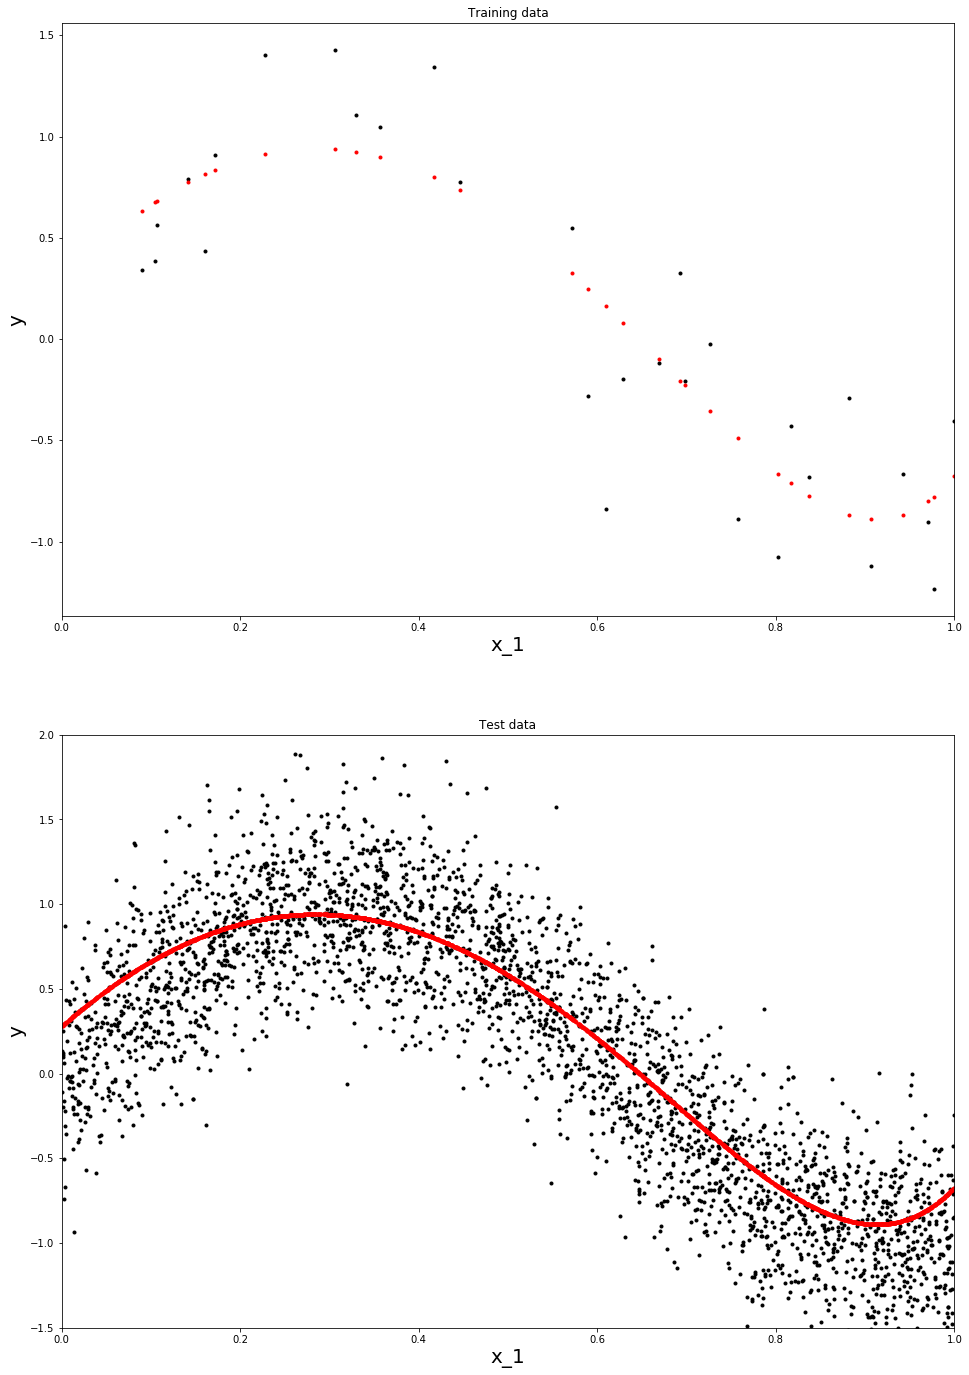

In [42]:
model = fn_lasso_regression(df_train, degree=15, l1_penalty=0.001)
fn_print_coefficients(model)
fn_plot_predictions(df_all, model)